In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2D

In [2]:
path = "../data/am4/"
year = '20100101-20141231'
exp = 'c96L33_am4p0_qadt_cosp_2010'
hemisphere = 'nh'

fon = xr.open_mfdataset(path + hemisphere + '_' + year + "_average_transect_" + exp +"_onice.nc",decode_cf = True).load()
fon.close()

foff = xr.open_mfdataset(path + hemisphere + '_' + year + "_average_transect_" + exp +"_office.nc",decode_cf = True).load()
foff.close()

fon = fon.sel(distance = slice(-6.5, 6.5))
foff = foff.sel(distance = slice(-6.5, 6.5))

myfontsize = 12

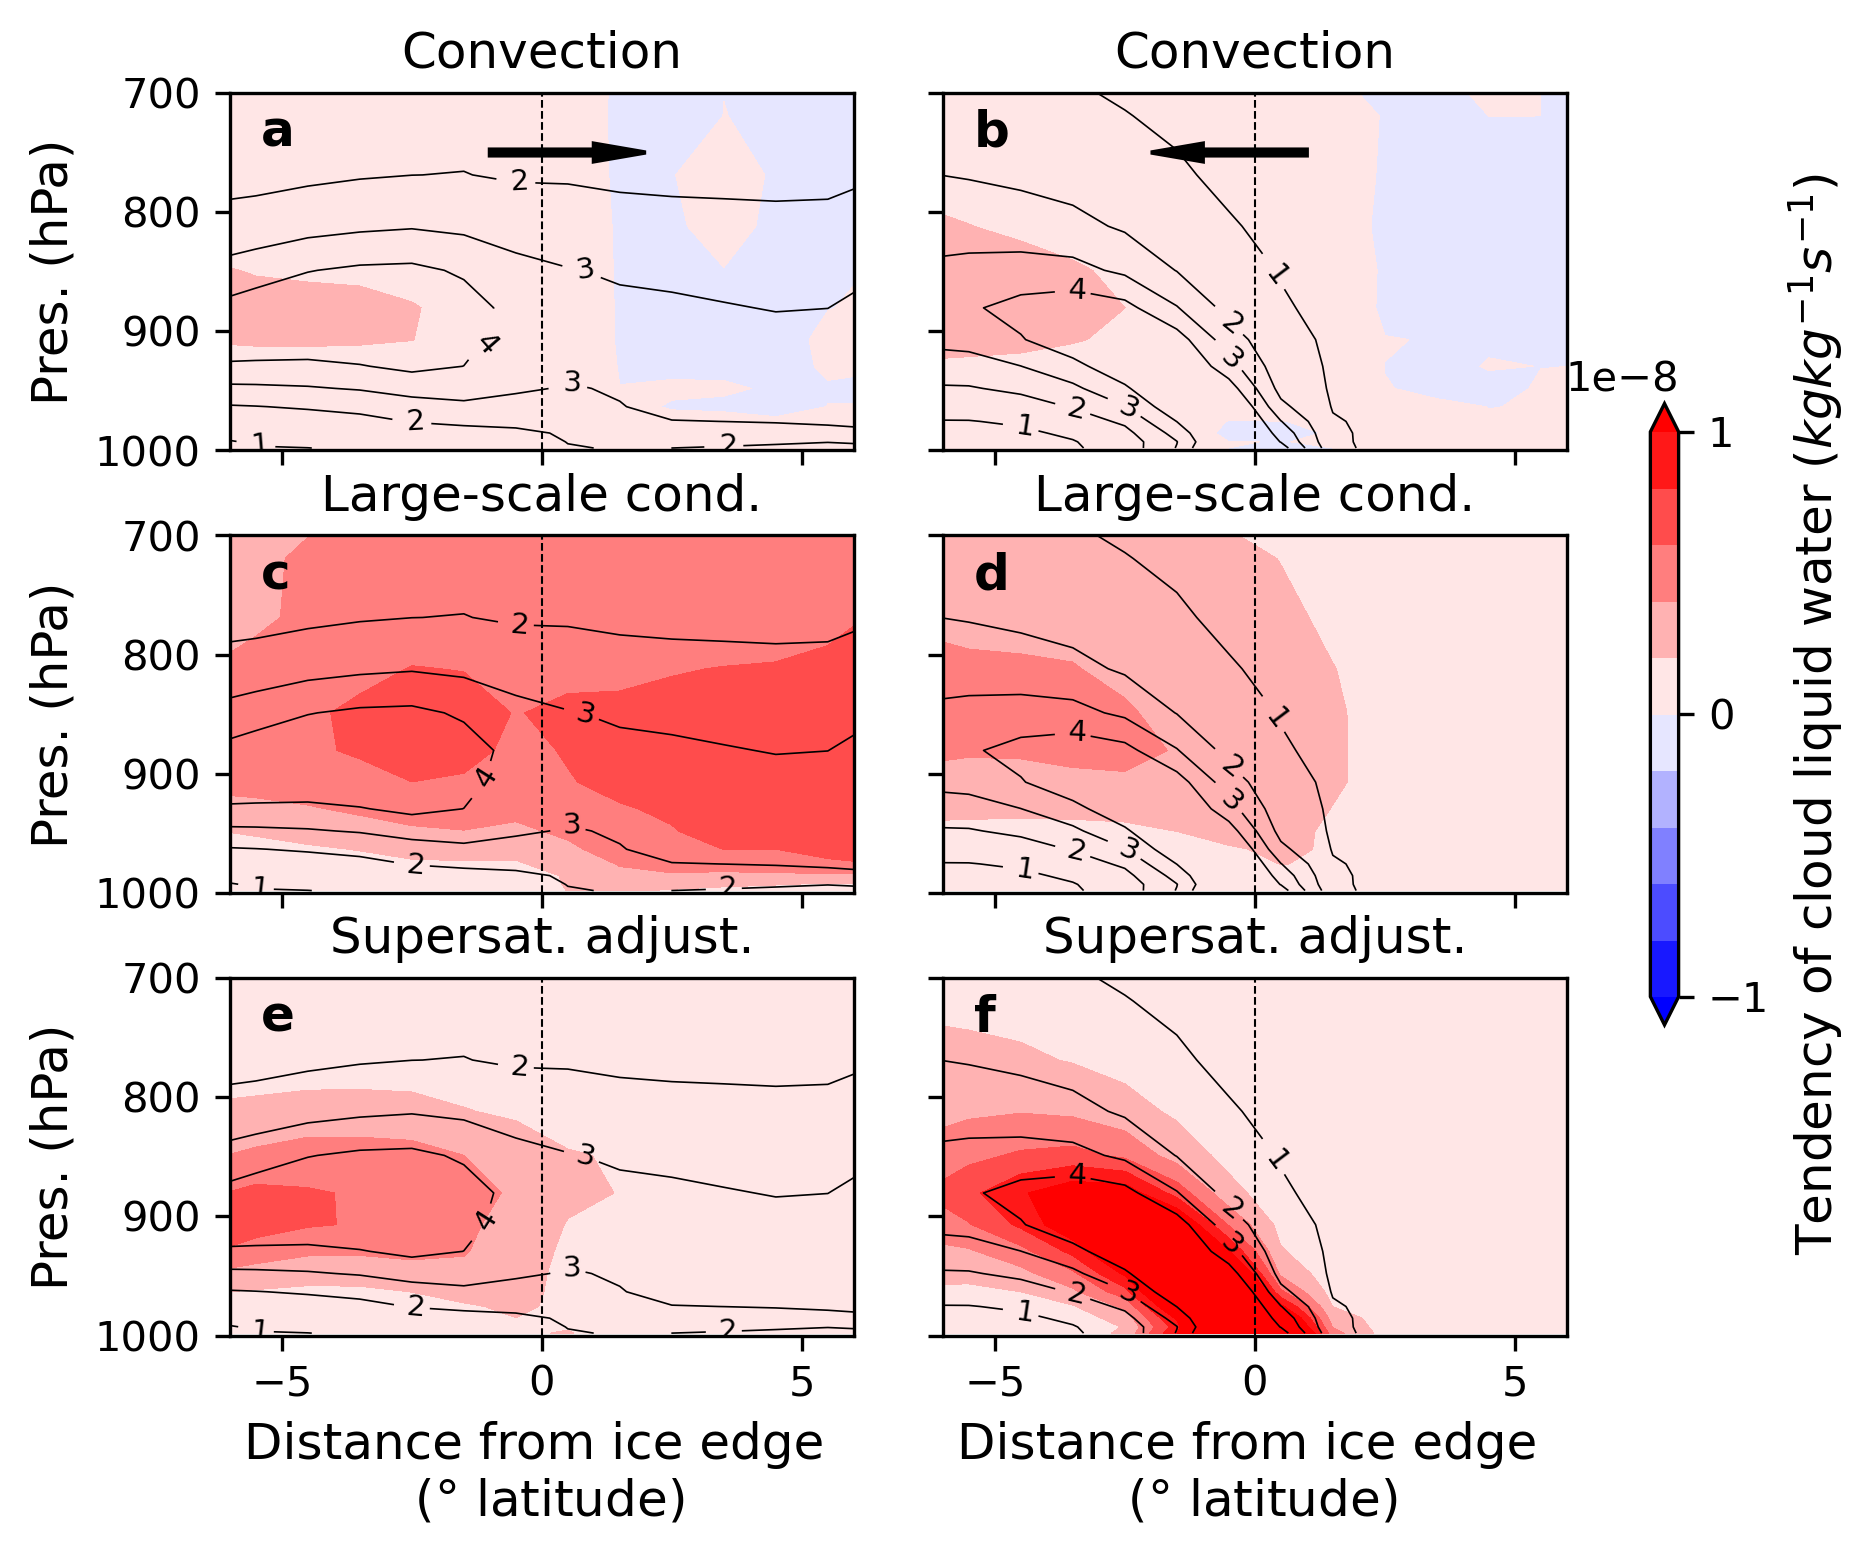

In [3]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 3,
                        sharex = True, sharey = True,
                        figsize=(16/2.54, 12/2.54), dpi = 300)

plt.tight_layout()
lim = 10.*(10.**-9)
ncl = 10
mylevels1 = [1., 2., 3., 4.]

#--------------1st col-----------------------------------------------------------
ff0 = fon.isel(season = 0)
x = ff0.distance.values
y = ff0.level.values
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)
axpos = -1

var = ff0.qldt_conv
plt2D(fig, axs[0,0], x, y, var, z1 = cld_amt, title = 'Convection', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1)
axs[0,0].arrow(axpos, 750, -2.*axpos, 0, width = 5, head_width=15, head_length=1, ec = 'black', fc = 'black')

var = ff0.qldt_cond
plt2D(fig, axs[1,0], x, y, var, z1 = cld_amt, title = 'Large-scale cond.', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

var = ff0.qldt_liqadj
plt2D(fig, axs[2,0], x, y, var, z1 = cld_amt, title = 'Supersat. adjust.', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1, xlabel = True)

#--------------2nd col-----------------------------------------------------------
ff0 = foff.isel(season = 0)
x = ff0.distance.values
y = ff0.level.values
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)
axpos = 1

var = ff0.qldt_conv
plt2D(fig, axs[0,1], x, y, var, z1 = cld_amt, title = 'Convection', levels=np.linspace(-lim, lim, ncl + 1), 
      cbar = False, cmap=cm.bwr, levels1 = mylevels1)
axs[0,1].arrow(axpos, 750, -2.*axpos, 0, width = 5, head_width=15, head_length=1, ec = 'black', fc = 'black')

var = ff0.qldt_cond
plt2D(fig, axs[1,1], x, y, var, z1 = cld_amt, title = 'Large-scale cond.', levels=np.linspace(-lim, lim, ncl + 1), 
      cbar = False, cmap=cm.bwr, levels1 = mylevels1)

var = ff0.qldt_liqadj
oax = plt2D(fig, axs[2,1], x, y, var, z1 = cld_amt, title = 'Supersat. adjust.', levels=np.linspace(-lim, lim, ncl + 1), 
      cbar = False, cmap=cm.bwr, levels1 = mylevels1, xlabel = True)

cbar = fig.colorbar(oax, ax = axs, orientation='vertical', 
                    shrink=0.5, pad = 0.05,ticks = [-lim, 0, lim])
cbar.set_label('Tendency of cloud liquid water ($kgkg^{-1}s^{-1}$)', fontsize=myfontsize)

mylabel = np.array((['a','b'],['c','d'],['e','f']))

for i in range(3):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], 
                      transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')
        
fig.savefig('Fig12_qldt_on-off-flow.png', dpi=fig.dpi, bbox_inches='tight')